In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 248MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout


In [6]:
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/train',
  labels='inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test',
  labels='inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model_summary = model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 66s 85ms/step - loss: 0.6683 - accuracy: 0.5740 - val_loss: 0.6181 - val_accuracy: 0.6450
Epoch 2/10
625/625 [==============================] - 47s 75ms/step - loss: 0.5625 - accuracy: 0.7143 - val_loss: 0.5057 - val_accuracy: 0.7472
Epoch 3/10
625/625 [==============================] - 46s 73ms/step - loss: 0.4741 - accuracy: 0.7786 - val_loss: 0.4606 - val_accuracy: 0.7816
Epoch 4/10
625/625 [==============================] - 45s 71ms/step - loss: 0.4050 - accuracy: 0.8203 - val_loss: 0.3814 - val_accuracy: 0.8306
Epoch 5/10
625/625 [==============================] - 48s 77ms/step - loss: 0.3615 - accuracy: 0.8448 - val_loss: 0.3714 - val_accuracy: 0.8364
Epoch 6/10
625/625 [==============================] - 45s 71ms/step - loss: 0.3098 - accuracy: 0.8705 - val_loss: 0.3707 - val_accuracy: 0.8448
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.2635 - accuracy: 0.8922 - val_loss: 0.3766 - val_accuracy:

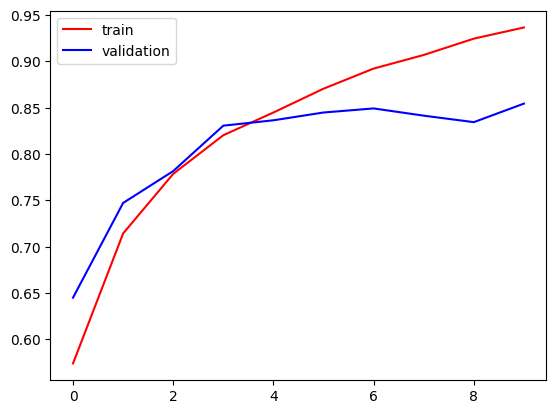

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
import cv2
test_img = cv2.imread('/content/doggie-daycare.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
x=model.predict(test_input)
x.tolist()
if x[0][0]==0:
  print('cat')
else:
  print('dog')

1/1 [==============================] - 0s 19ms/step
dog
